# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [2]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [3]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [4]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [6]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 432x288 with 0 Axes>

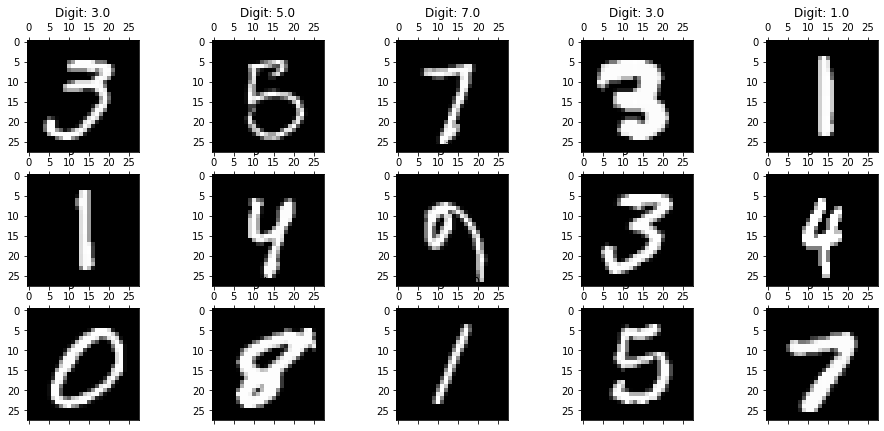

In [7]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
print(f"X_train shape : {X_train.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"y_test shape : {y_test.shape}")

X_train shape : (56000, 784)
X_test shape : (14000, 784)
y_train shape : (56000, 1)
y_test shape : (14000, 1)


### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

#### PCA

In [10]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_train)

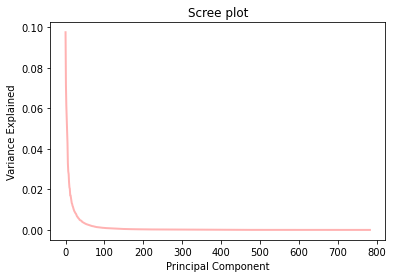

In [11]:
# Scree Plot
plt.plot(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, 'r-', linewidth=2, alpha = 0.3)
plt.title("Scree plot")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.show()

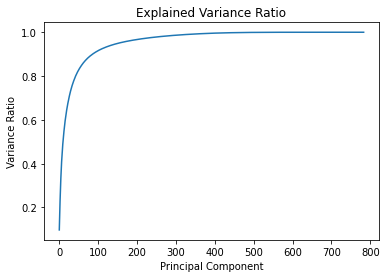

In [12]:
# 누적 설명 비율 그래프
plt.plot(range(len(np.cumsum(pca.explained_variance_ratio_))), np.cumsum(pca.explained_variance_ratio_))
plt.title("Explained Variance Ratio")
plt.xlabel("Principal Component")
plt.ylabel("Variance Ratio")
plt.show()

#### LDA

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_train, np.ravel(y_train))

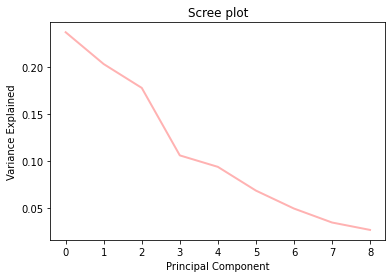

In [14]:
# Scree Plot
plt.plot(range(len(lda.explained_variance_ratio_)), lda.explained_variance_ratio_, 'r-', linewidth=2, alpha = 0.3)
plt.title("Scree plot")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.show()

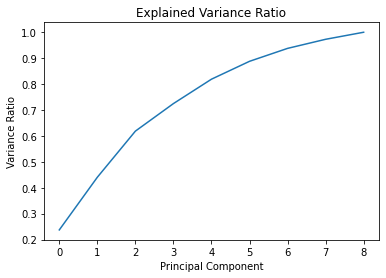

In [15]:
# 누적 설명 비율 그래프
plt.plot(range(len(np.cumsum(lda.explained_variance_ratio_))), np.cumsum(lda.explained_variance_ratio_))
plt.title("Explained Variance Ratio")
plt.xlabel("Principal Component")
plt.ylabel("Variance Ratio")
plt.show()

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

#### LGBMClassifier

- Original Data

In [16]:
import time 
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score   

start_time = time.time()
lgbm = LGBMClassifier(random_state = 42)
lgbm.fit(X_train, np.ravel(y_train))
pred = lgbm.predict(X_test)
end_time = time.time()

print(f"LGBMClassifier Acuuracy: {accuracy_score(y_test, pred)}")
print(f"LGBMClassifier Time: {end_time-start_time}")

LGBMClassifier Acuuracy: 0.977
LGBMClassifier Time: 55.673691749572754


- PCA

In [17]:
np.cumsum(pca.explained_variance_ratio_)[42]

0.8002674903573073

In [18]:
pca = PCA(n_components = 42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

start_time = time.time()
lgbm = LGBMClassifier(random_state = 42)
lgbm.fit(X_train_pca, np.ravel(y_train))
pred = lgbm.predict(X_test_pca)
end_time = time.time()

print(f"LGBMClassifier Acuuracy: {accuracy_score(y_test, pred)}")
print(f"LGBMClassifier Time: {end_time-start_time}")

LGBMClassifier Acuuracy: 0.9656428571428571
LGBMClassifier Time: 5.746918439865112


- LDA

In [19]:
np.cumsum(lda.explained_variance_ratio_)[4]

0.8188435036237969

In [20]:
lda = LinearDiscriminantAnalysis(n_components = 4)
X_train_lda = lda.fit_transform(X_train, np.ravel(y_train))
X_test_lda = lda.transform(X_test)

start_time = time.time()
lgbm = LGBMClassifier(random_state = 42)
lgbm.fit(X_train_lda, np.ravel(y_train))
pred = lgbm.predict(X_test_lda)
end_time = time.time()

print(f"LGBMClassifier Acuuracy: {accuracy_score(y_test, pred)}")
print(f"LGBMClassifier Time: {end_time-start_time}")

LGBMClassifier Acuuracy: 0.8327142857142857
LGBMClassifier Time: 2.280714988708496


성능은 원본데이터로 진행했을 때가 가장 좋음   
하지만 속도측면에서 PCA, LDA가 압도적으로 빠름  
따라서 성능과 속도 측면을 모두 고려할 경우 성능도 많이 떨어지지 않으면서 속도가 빠른 PCA가 가장 적합하다고 판단

- Original Data

In [21]:
import time 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score   

start_time = time.time()
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, np.ravel(y_train))
pred = rf.predict(X_test)
end_time = time.time()

print(f"RandomForestClassifier Acuuracy: {accuracy_score(y_test, pred)}")
print(f"RandomForestClassifier Time: {end_time-start_time}")

RandomForestClassifier Acuuracy: 0.969
RandomForestClassifier Time: 42.292221546173096


In [22]:
pca = PCA(n_components = 42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

start_time = time.time()
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train_pca, np.ravel(y_train))
pred = rf.predict(X_test_pca)
end_time = time.time()

print(f"RandomForestClassifier Acuuracy: {accuracy_score(y_test, pred)}")
print(f"RandomForestClassifier Time: {end_time-start_time}")

RandomForestClassifier Acuuracy: 0.9535
RandomForestClassifier Time: 51.720144271850586


In [23]:
lda = LinearDiscriminantAnalysis(n_components = 4)
X_train_lda = lda.fit_transform(X_train, np.ravel(y_train))
X_test_lda = lda.transform(X_test)

start_time = time.time()
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train_lda, np.ravel(y_train))
pred = rf.predict(X_test_lda)
end_time = time.time()

print(f"RandomForestClassifier Acuuracy: {accuracy_score(y_test, pred)}")
print(f"RandomForestClassifier Time: {end_time-start_time}")

RandomForestClassifier Acuuracy: 0.8303571428571429
RandomForestClassifier Time: 17.723520278930664


성능은 원본데이터로 진행했을 때가 가장 좋음   
하지만 속도측면에서 LDA가 조금 빠름  
따라서 해당 모델의 경우 성능과 속도 측면을 모두 고려할 경우 원본데이터가 적합하다고 판단

특정한 틀 없이 자유롭게 해주시면 됩니다!